Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Tom Melis, SNR 2009060 ANR 515502"
COLLABORATORS = ""

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

and if you are doing this with someone else (not more than one other person):

COLLABORATORS = "Karl Marx, #student number#"

# exam June 7th, 2018



In the first cell of the notebook, give us your name and student number in the way indicated above. If you do this notebook with --at max.-- one other student, give her/his name and student number as well under "COLLABORATORS".

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam June 7, 2018".



## price effects of mergers

We consider a merger in this notebook. 

First we calculate the equilibrium with three firms, denoted by 1, 2 and 3. Then firms 2 and 3 merge so that we are left with 2 firms; denoted by 1 and 2.

We calculate the effects of the merger on the equilibrium price.

We start by importing the usual libraries.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

The following code helps to calculate the equilibrium for the case with 3 firms. Note that you have seen similar code during the tutorials to calculate the equilibrium with 2 firms.

We assume that before the merger each firm has constant marginal costs equal to 0.3. We assume a simple linear (inverse) demand curve of the form $p=1-Q$ where $p$ denotes price and $Q$ total output on the market. Total output equals the sum of each firm's output: $Q= q_1 + q_2+q_3$.

In [3]:
c0 = 0.3
vector_c = [c0]*3

def p(Q):
    return 1 - Q

def costs(q,c):
    return c*q

def profits(q,Q_other,c):
    return p(q+Q_other)*q-costs(q,c)

def reaction(Q_other,c):
    q1 =  optimize.fminbound(lambda x: -profits(x,Q_other,c),0,1,full_output=1)
    return q1[0]

def fixed_point_three_firms(vector_q,vector_c):
    return [vector_q[0]-reaction(vector_q[1]+vector_q[2],vector_c[0]),
            vector_q[1]-reaction(vector_q[0]+vector_q[2],vector_c[1]),
            vector_q[2]-reaction(vector_q[0]+vector_q[1],vector_c[2])]



#### a) [0.5 points] Show that total equilibrium output equals  0.525. Derive the equilibrium price and Herfindahl index; denote these by `P0` and `H0` resp.

In [4]:
#We want to know c. We don't know q, however. Therefore, we insert in optimize.fsolve q as a variable and three times 0.3 costs.
#Since 0.175 divided by three is 0.525, I initially guess q will be 0.175 for every firm. This turns out to be true, as shown below.

initial_guess = [0.175,0.175,0.175]
optimize.fsolve(lambda q: fixed_point_three_firms(q, [0.3,0.3,0.3]), initial_guess)



array([0.175, 0.175, 0.175])

In [5]:
#Computing quantity in the entire history is just adding all those quantities up. Furtunately, every firm produces exactly the same quantity.
q1 = q2 = q3 = 0.175
Q = q1 + q2 + q3
print(Q)

0.5249999999999999


In [6]:
#The equilibrium price is then just inserting Q in the price function
P0 = p(Q)
print(P0)


0.4750000000000001


In [7]:
#The Herfindahl index is according to week 3 the quadratic size of the market share of the three firms. 
# Hence, we divide every q by Q and we square the fractures
# Finally, we add all individual Herfindahl indices up to H0.
Hq1 = (q1/Q)**2
Hq2 = (q2/Q)**2
Hq3 = (q3/Q)**2
H0 = Hq1+Hq2+Hq3
print(H0)

0.33333333333333337


#### b) [0.5 point] Define a function `fixed_point_two_firms` with the same structure as the function `fixed_point_three_firms` above, except that it derives the equilibrium output levels for a duopoly (two firms). Test this function by showing that each of the two firms produces 0.3333 in case both firms have zero costs.

In [123]:
#Two  things have changed. First, costs are now zero, so we have to change c.
#Second, the quantity function changes slightly since there are now only two firms.
c0 = 0
vector_c  = [c0]*2

def fixed_point_two_firms(vector_q,vector_c):
    return [vector_q[0]-reaction(vector_q[1],vector_c[0]),
            vector_q[1]-reaction(vector_q[0],vector_c[1])]


In [124]:
#After this definition, we can solve the quantity again. 
#I guess both firms have a quantity of 0.333 as that's suggested above and I insert 0 for the costs.
#Solving gives indeed the correct answer.
initial_guess = [0.333, 0.333]
optimize.fsolve(lambda q: fixed_point_two_firms(q, [0, 0]), initial_guess)



array([0.33333333, 0.33333333])

The Dutch competition authority, ACM, is asked to evaluate the effects of a merger between firms 2 and 3. Firms 2 and 3 claim that by merging they can reduce their constant marginal costs. But it is not clear by how much they will reduce their costs.

The ACM assumes that the marginal cost level of the merged firm is uniformly distributed between 0 and the current marginal cost level `c0`. The merger will not affect the marginal cost level of firm 1 who does not merge. Firm 1's cost level remains `c0`.

The next cell generates a vector of cost levels for the merged firm, denoted `c_after_merger`. Evaluate "c_after_merger" in a separate cell if you do not understand the command that defines it.

Then it calculates the equilibrium output levels for (the non-merging) firm 1 and (the merged) firm 2.

Note that you need to specify `initial_guess`.


In [125]:
#I guess the merged company will be able to sell for a lower price and thus will have a higher quantity than the non-merged firm.
#Therefore I guess [0,10]. This seems to be wrong
c0 = 0
c_after_merger = np.random.uniform(0,c0,size = 100)
initial_guess = [0,10]
q1_after_merger = [optimize.fsolve(lambda q: fixed_point_two_firms(q,[c0,c]), initial_guess)[0] for c in c_after_merger]
q2_after_merger = [optimize.fsolve(lambda q: fixed_point_two_firms(q,[c0,c]), initial_guess)[1] for c in c_after_merger]
print(q1, q2)

0.175 0.175


#### c) [0.5 points] Create a dataframe called `df_after_merger` with three columns: `c_merged_firm`, `output_non_merging_firm`, `output_merged_firm` containing resp. the cost level of the merged firm, the output level of firm 1 and the output level of firm 2.

In [127]:
#First, I define each column. Second, I define those columns as being indeed columns and then I pass them on to df_after_merger.

c_merged_firm = c_after_merger
output_non_merging_firm = q1_after_merger
output_merged_firm = q2_after_merger
index = [c0, q1, q2]
columns = ['c_merged_firm','output_non_merging_firm','output_merged_firm']
df_after_merger = pd.DataFrame(index = index, columns=columns)


print(df_after_merger)

      c_merged_firm output_non_merging_firm output_merged_firm
0.000           NaN                     NaN                NaN
0.175           NaN                     NaN                NaN
0.175           NaN                     NaN                NaN


#### d) [0.5 points] Add three columns to the dataframe with resp. total equilibrium output on the market, `Q`, equilibrium price, `P` and the Herfindahl index, `H`.

In [128]:
vector_q = q1 + q2
P = 1 - Q
H = (q1/Q)**2 + (q2/Q)**2


equilibrium_price = P
Herfindahl_index = H

df_after_merger['Q'] = vector_q
df_after_merger['P'] = 1-Q
df_after_merger['H'] = H 
print(df_after_merger)

      c_merged_firm output_non_merging_firm output_merged_firm     Q      P  \
0.000           NaN                     NaN                NaN  0.35  0.475   
0.175           NaN                     NaN                NaN  0.35  0.475   
0.175           NaN                     NaN                NaN  0.35  0.475   

              H  
0.000  0.222222  
0.175  0.222222  
0.175  0.222222  


#### e) [0.5 points] Make a histogram of the equilibrium price `P` after the merger. Also indicate in the histogram the equilibrium price before the merger `P0`. Label the horizontal axis with $P$.

[hint: you may want to use matplotlib's `hist`, `vlines` and `legend` to make this graph (e.g use google to find these functions); but feel free to use something else]

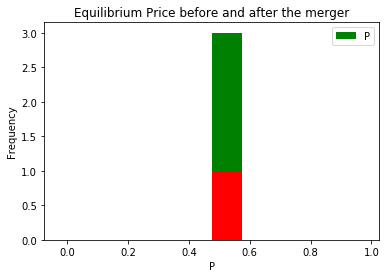

In [129]:
#First, we plot the price after the merger. We make a histogram plot with a green bar and we plot P to the x-axis.
#Secondly, we indicate the equilibrium price before the merger by a red bar.
#To clarify the green bar belongs to the new equilibrium price, we make a legend
#Finally, we add a title.
df_after_merger['P'].plot(kind='hist', color = 'green')
plt.xlabel('P')
plt.title('Equilibrium Price before and after the merger')
plt.hist(P0, color = 'red')
plt.legend()

#### f) [0.5 points] Explain why sometimes the equilibrium price after the merger exceeds the equilibrium price before the merger and sometimes it is lower than the pre-merger price. [hint: there is a trade off between two effects, depending on which effect dominates, equilibrium price increases or decreases after the merger]

When two firms merge, two things can happen. 
First, it's likely that a merger will lead to lower costs on the long run, since overhead expenditures decrease. 
However, this decrease in costs may be offset in the short run if the merger itself is very costly; if it costs the firm a lot of money to merge with the other company, it will need to increase its price in the short run and the equilibrium price will be higher.
If the market only consists out of three firms, as in this example, it's also very likely that the merged firm will abuse its market power and as a consequence increase the price.

#### g) [0.5 points] Make a graph with the Herfindahl index on the horizontal axis and the equilibrium price on the vertical axis. This is straightforward for $(H,P)$ after the merger as both values are in the dataframe. Add in another color, the pre-merger combination `(H0,P0)` that we calculated above.

No handles with labels found to put in legend.


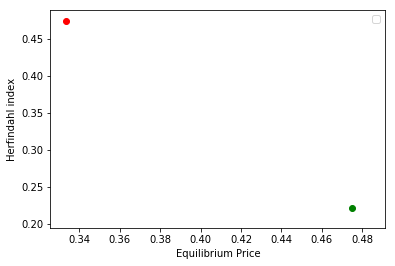

In [130]:
plt.scatter(P, H, color = 'green')

#The equilibrium price and Herfindahl index for the pre-merger situation are depicted by the red dot)
plt.scatter(H0, P0, color = 'red')

plt.xlabel('Equilibrium Price')
plt.ylabel('Herfindahl index')

plt.legend()

#### h) [0.5 points] Use the graph under g) to discuss the relation between the Herfindahl index and the equilibrium price. To illustrate, some people think that lower values of the Herfindahl index are associated with more competitive outcome. Would you agree with this?

As we can see in the graph under g, the equilibrium price that is achieved after the merger has occured is much higher than the equilibrium price before the merger. As a result, the Herfindahl index is much lower. Judging from this data, a high value of the Herfindahl Index seems to be correlated with a low equilibrium price. 
Intuively, that makes sense; when the Herfindahl Index is low, firms have less market power and are consequently less capable to influence prices. Hence, a lower value of the Herfindahl index is likely to be associated with more competitive outcomes; I agree with the statement.

## Github

After you have finished, we need to upload this notebook on github. Make sure that you upload the file on the github page of each collaborator.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.

In [ ]:
#The cell below is just a duplication of one of the exercises and doesn't add anything to my answers. 
#I can't delete it anymore so I placed it down below. 

In [ ]:
c_after_merger = np.random.uniform(0,c0,size = 100)

q1_after_merger = [optimize.fsolve(lambda q: fixed_point_two_firms(q,[c0,c]), initial_guess)[0] for c in c_after_merger]
q2_after_merger = [optimize.fsolve(lambda q: fixed_point_two_firms(q,[c0,c]), initial_guess)[1] for c in c_after_merger]


